## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Write this out to QA results in Excel
master_merge.to_csv("merge.csv", index=False, header=True)

# Display the data table for preview
master_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
num_mice = master_merge["Mouse ID"].nunique() 
num_mice

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = master_merge[master_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 

# I think that's what I did above?

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
master_merge.drop(master_merge.loc[master_merge['Mouse ID']=="g989"].index, inplace=True)

# I think I dropped the duplicate but not in the context of creating a clean data frame object
# Just setting to a variable did not work

In [43]:
# Export to see what I've got
master_merge.to_csv("dropdupes.csv", index=False, header=True)


In [46]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = master_merge["Mouse ID"].nunique() 
num_clean_mice

248

In [47]:
# Adding a check to see count of records - should be less than original count (we see it removed all 13 rows for g989)
master_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Aren't these two things above giving the same result???

# Groupby
regimen_group = master_merge.groupby(['Drug Regimen'])
# regimen_stats = regimen_group[["Tumor Volume (mm3)"]].describe()

# Calculate values
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_group["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_group["Tumor Volume (mm3)"].sem()

#  Make new summary df
regimen_stats_summary = pd.DataFrame({"Mean":regimen_mean,
                                     "Median": regimen_median,
                                     "Variance": regimen_var,
                                     "Standard Deviation":regimen_stdev,
                                     "SEM":regimen_SEM})

regimen_stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# I don't even understand what this is asking? Single line? 
# It is in a single line by regimen above as far as I am concerned.


## Bar and Pie Charts

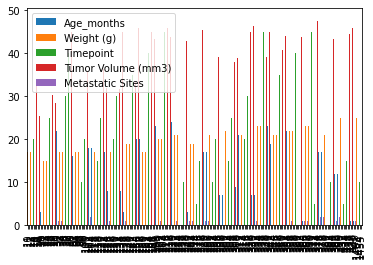

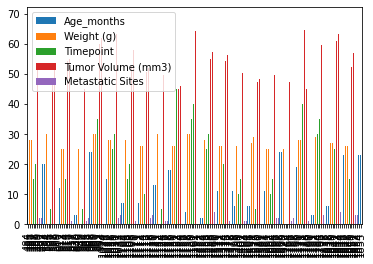

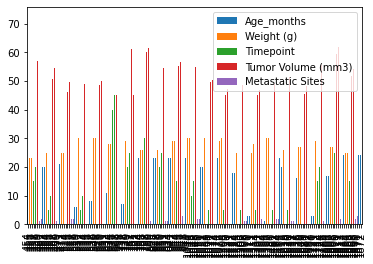

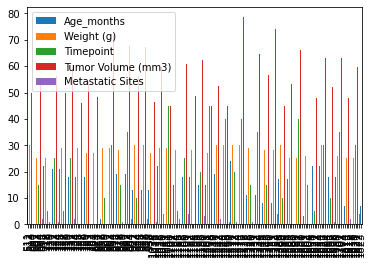

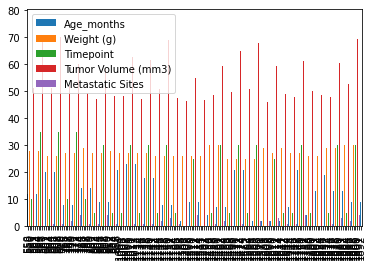

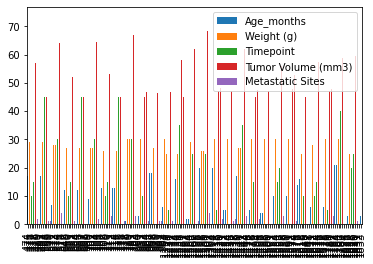

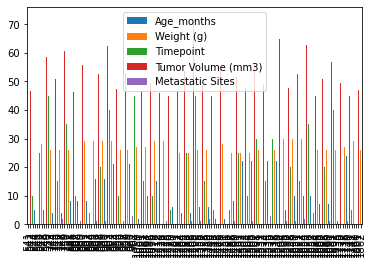

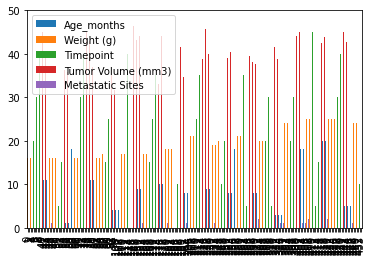

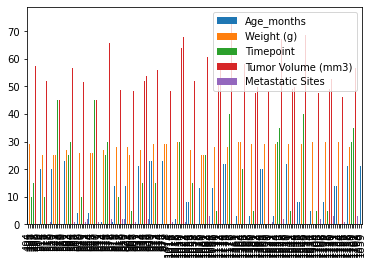

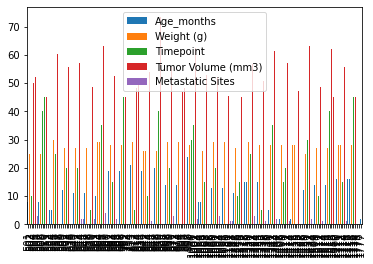

In [83]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
reg_count = regimen_group.count()
reg_count

# Need to pull out only the count and the reg name (10 total)
# Maybe set index to reg name and or create a new df with only those two columns for plot
# See avg. state rain example
regimen_group.plot(kind="bar")
plt.show()
# Use DataFrame.plot() in order to create a bar chart of the data
#state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
#plt.title("Average Rain Per State")

#plt.show()
#plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
